# Emission Measure Calculations

In [2]:
#%matplotlib notebook

In [1]:
# imports
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from astropy import units
from astropy import constants

from frb import em
from frb.halos import models

# EM from H$\alpha$

## Follow Reynolds 1977

In [2]:
obs_Ha = 1e-17 * units.erg / units.cm**2 / units.s / units.arcsec**2

In [3]:
Ha = 6564. * units.Angstrom
E_Ha_photon = constants.c * constants.h / Ha
E_Ha_photon.to('erg')

<Quantity 3.0262734e-12 erg>

In [4]:
(obs_Ha*units.ph/E_Ha_photon).decompose().to('rayleigh') * 68

<Quantity 120.13260183 R>

In [5]:
(7.96e8 * E_Ha_photon / units.s / units.m**2 / units.sr).to('erg/s/cm**2/sr')

<Quantity 2.40891362e-07 erg / (cm2 s sr)>

### FRB 121102

In [6]:
reload(em)
em_121102 = em.em_from_halpha(6.8e-16*units.erg/units.cm**2/units.s/units.arcsec**2, 0.1927)
em_121102

<Quantity 668.58866588 pc / cm6>

### FRB 180924

In [7]:
Ha_total = 28.1 * 1e-17 * units.erg/units.s/units.cm**2

#### Assume 5% of the average surface brightness at the FRB; this should be conservative

In [8]:
Ha_180924 = 0.05 * Ha_total / units.arcsec**2
Ha_180924

<Quantity 1.405e-17 erg / (arcsec2 cm2 s)>

In [9]:
EM_180924 = em.em_from_halpha(Ha_180924, 0.3214)
EM_180924

<Quantity 20.81319506 pc / cm6>

# DM from EM -- Reynolds and Cordes

### FRB 121102

In [10]:
reload(em)
DM_s = em.dm_from_em(em_121102, 1*units.kpc)
DM_s

<Quantity 408.5214313 pc / cm3>

### FRB 180924

In [11]:
DM_s_180924 = em.dm_from_em(EM_180924, 0.1*units.kpc)
DM_s_180924/(1+0.32)

<Quantity 17.26755253 pc / cm3>

# Fooling around in the Halo

## Emissivity --  $j_\nu \sim n_e^2 \, \exp[-(h\nu - Z^2 h \nu_0/n^2)/kT] / T^{3/2}$

In [12]:
mw = models.MilkyWay()

### Plot $n_e^2$

In [13]:
xyz = np.zeros((3,100))
Z = np.linspace(10,300,100)
xyz[2,:] = Z

In [14]:
nesq = mw.ne(xyz)**2

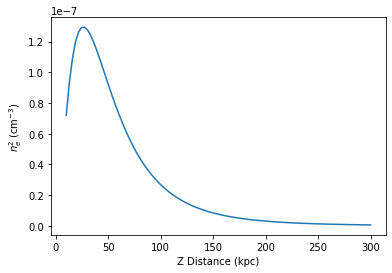

In [15]:
# 
plt.clf()
ax = plt.gca()
ax.plot(Z, nesq)
# Labels
ax.set_xlabel('Z Distance (kpc)')
ax.set_ylabel(r'$n_e^2 \; (\rm cm^{-3})$')
plt.show()

### Plot Emission per radial shell

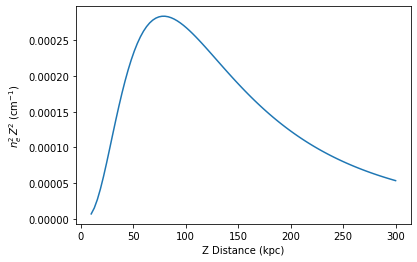

In [16]:
plt.clf()
ax = plt.gca()
ax.plot(Z, nesq* Z**2)
# Contrast with ISM (ignoring Temperature which reduces the halo further)
#ax.plot([0., 300], [0.1**2 * 10.**2]*2, 'b--')
# Labels
ax.set_xlabel('Z Distance (kpc)')
ax.set_ylabel(r'$n_e^2 \, Z^2 \; (\rm cm^{-1})$')
#
plt.show()